<a href="https://colab.research.google.com/github/AcidRa1nCloud/DataScienceHW_1_LifeExpect/blob/main/01_deep_learning_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Life Expectancy using Neural Networks and Machine Learning Methods

Welcome to this Jupyter Notebook that explores the fascinating world of predicting life expectancy using neural networks and various machine learning methods. In this notebook, we will dive into the process of building, training, and evaluating predictive models based on a comprehensive dataset containing features that might influence the life expectancy of different countries.

## Introduction

Life expectancy is a critical demographic indicator that reflects the overall health and well-being of a population. Various factors, such as economic development, healthcare infrastructure, education, and lifestyle choices, contribute to the differences in life expectancy among countries. Predicting life expectancy is not only a challenging task but also has significant implications for public health planning and policy-making.

In this notebook, we will work with the [Life Expectancy (WHO)](https://www.kaggle.com/kumarajarshi/life-expectancy-who) dataset from Kaggle. This dataset provides a rich set of features, including GDP, education, alcohol consumption, and more, for different countries over multiple years. Our goal is to leverage these features to train predictive models that can estimate life expectancy accurately.

# Homework 1

## Part 1
- Perform an Exploratory Data Analysis (EDA) in a separate jupyter notebook.
- In the form of a markdown, define a task.
- What is the question?
- What is the metric?
- Explain metric selection.

## Part 2
Create a project for model training and evaluation. Suggested project structure:

├── data # folder with the dataset

├── experiments # folder to save trained models

├── model.py # model class and metrics

├── engine.py # training and evaluation functions

├── data_loader.py # dataset and dataloader

├── run.py # define model hp (parse args), train and validate models, run TB (optional)

├── utils.py # utils functions

## Part 3
- Select the loss function according to the task.
- Adjust model output accordingly.
- Add sigmoid activation for the classification task.
- Add early stopping.

### Experiment with the model training:

- model depth
- model width
- dropout probability
- normalization layers
- Plot experiments results.

## EDA

In [ ]:
# imports and view data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pathlib

data = pathlib.Path('./data')
if not data.is_dir():
    print('Creating data folder...')
    data.mkdir(parents=True, exist_ok=True)
    print('Data folder created!')

life_df = pd.read_csv('data/Life Expectancy Data.csv')
life_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
# Check info
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
# Look if there are missing values
print('Shape: ',life_df.shape,'\n')
print('Empty values count: \n')
missing = life_df.isna().sum()
print(missing)
missing = missing[missing>0].index

Shape:  (2938, 22) 

Empty values count: 

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [ ]:
# Columns with missing values
missing

Index(['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
# Fill in the missing values with median
for c in life_df.columns:
    if c in missing:
        life_df[c] = life_df[c].fillna(life_df[c].median())

In [ ]:
# Check if missing values were dropped/filled
life_df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

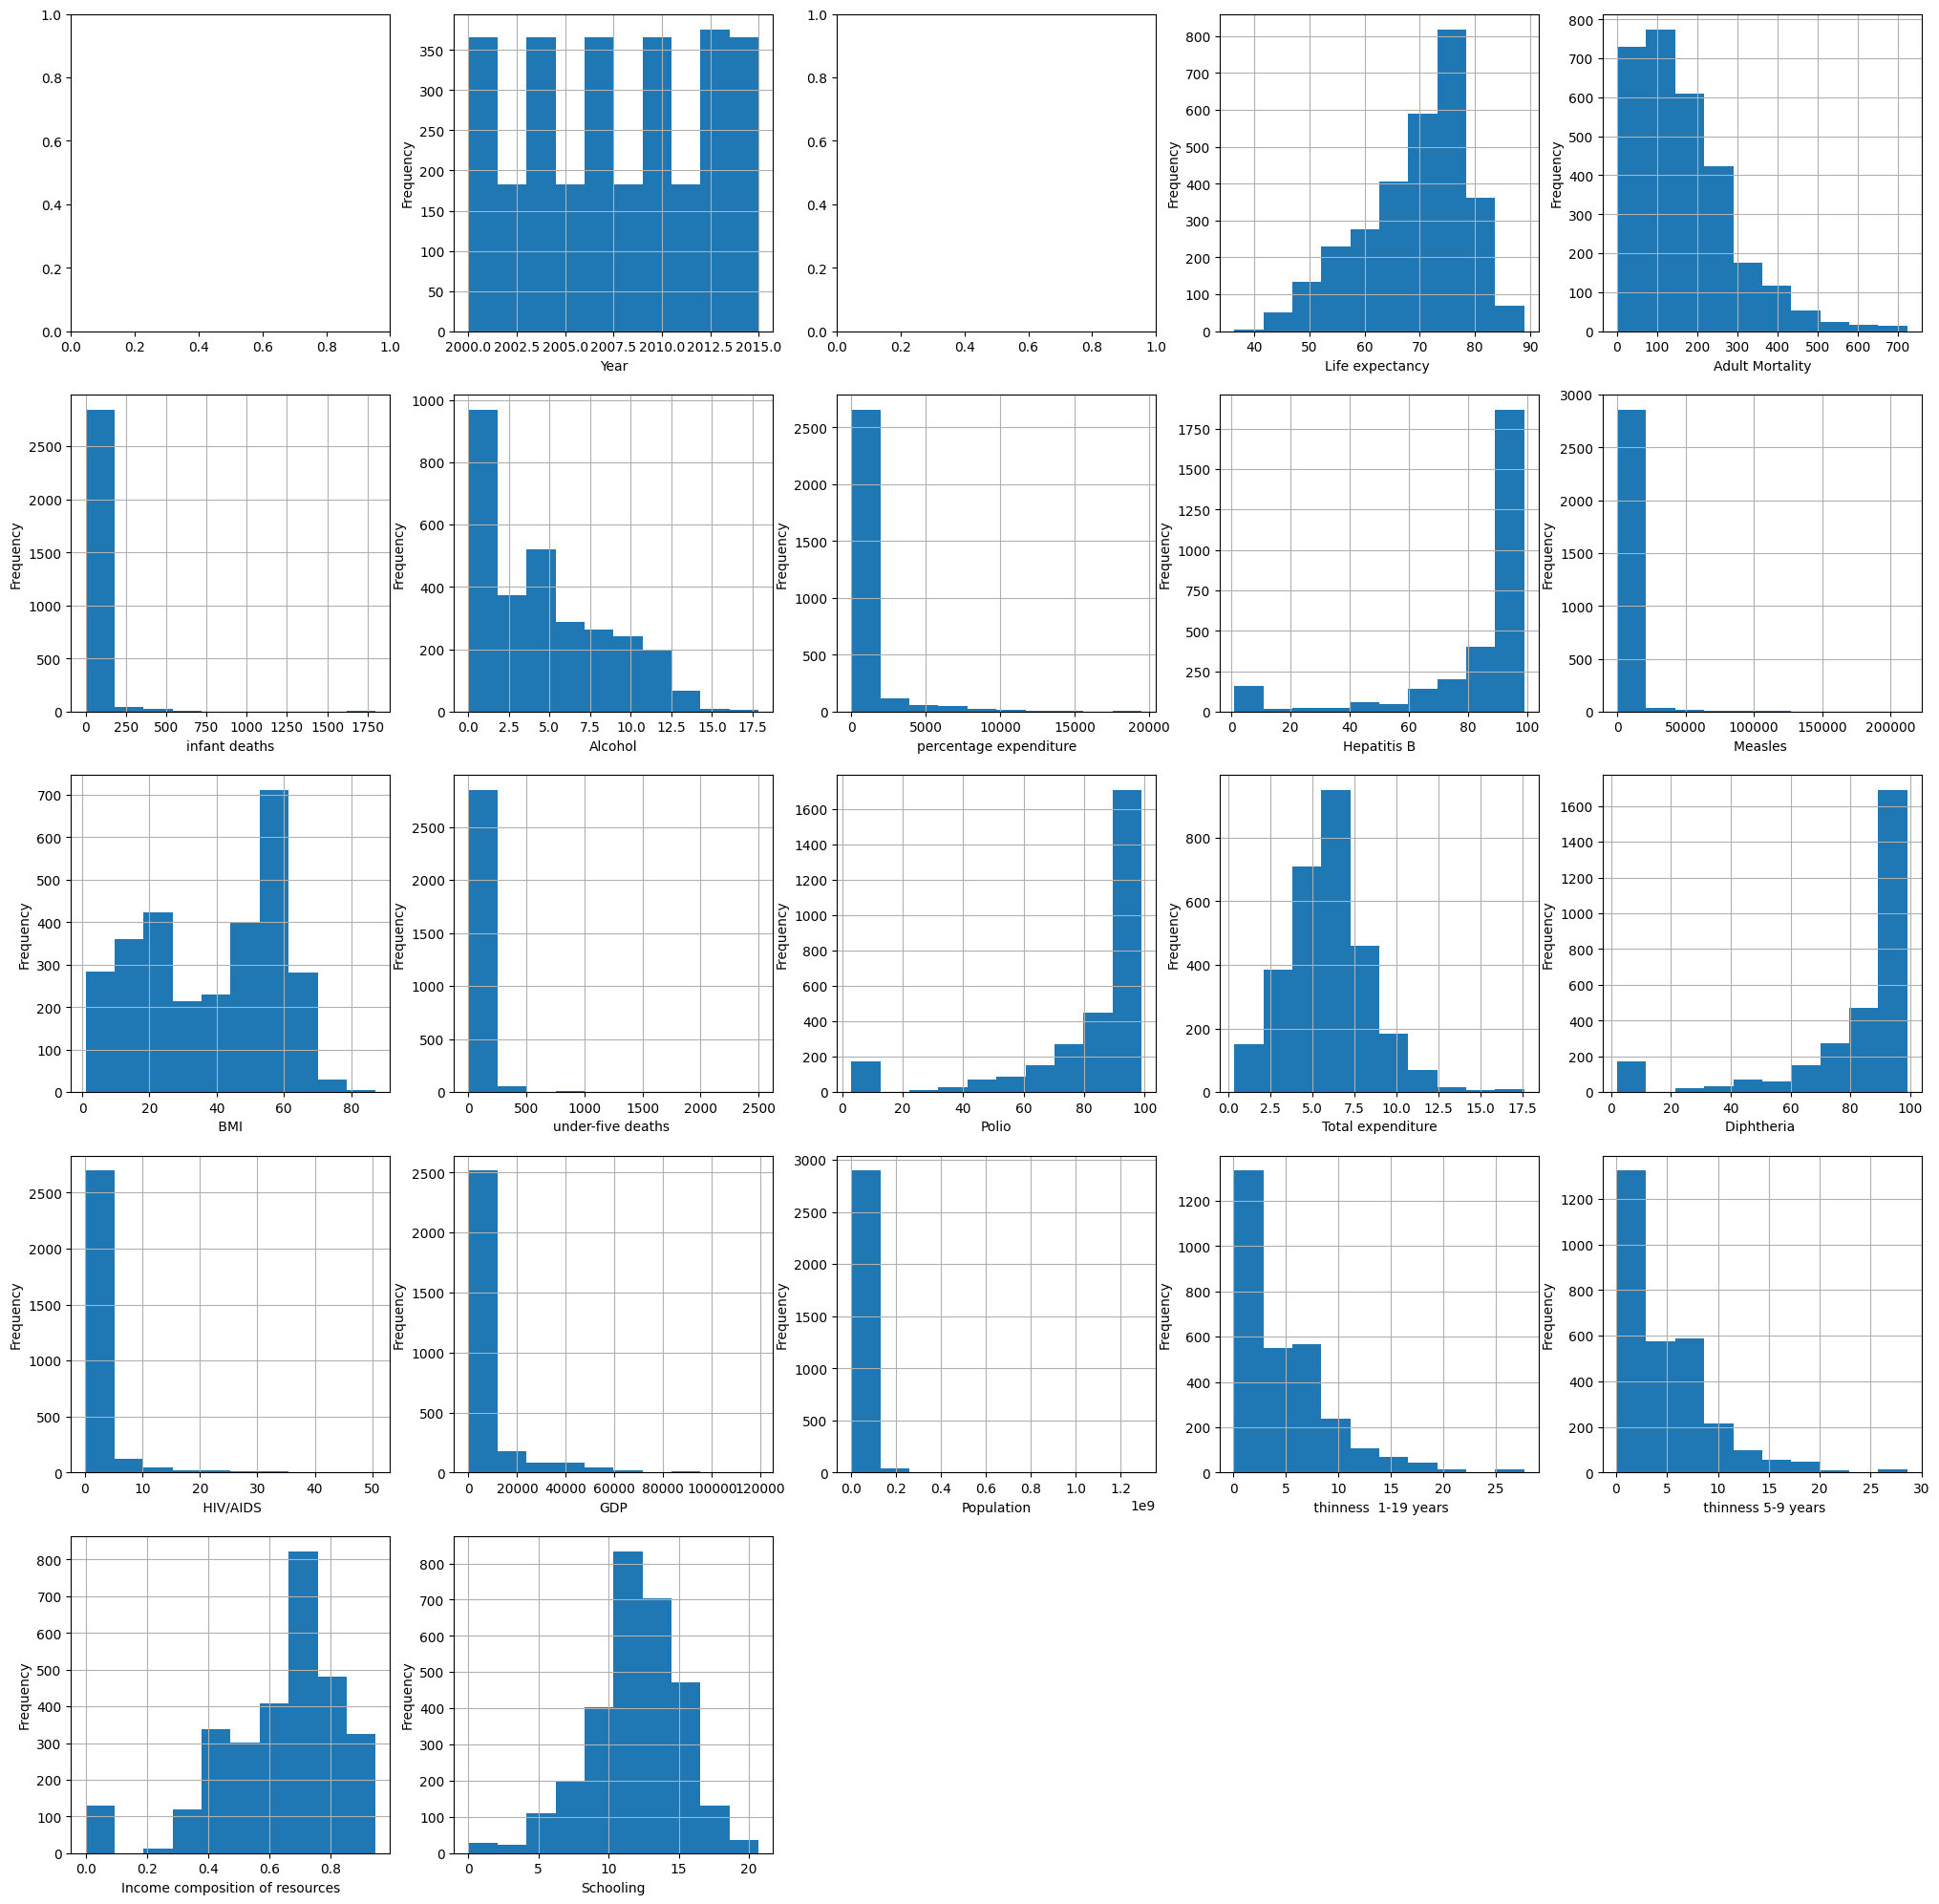

In [ ]:
# Plot distributions of features
fig = plt.figure(figsize=(25, 25))

for i, c in enumerate(life_df.columns):
    fig.add_subplot(5, 5, i+1)
    if life_df[c].dtype in ['object']:
        continue
    life_df[c].plot(kind='hist')
    plt.grid(True)
    plt.xlabel(c)

<ipython-input-8-6ae1f2f8a416>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(life_df.corr(), annot=True)


<Axes: title={'center': 'Correlation of features'}>

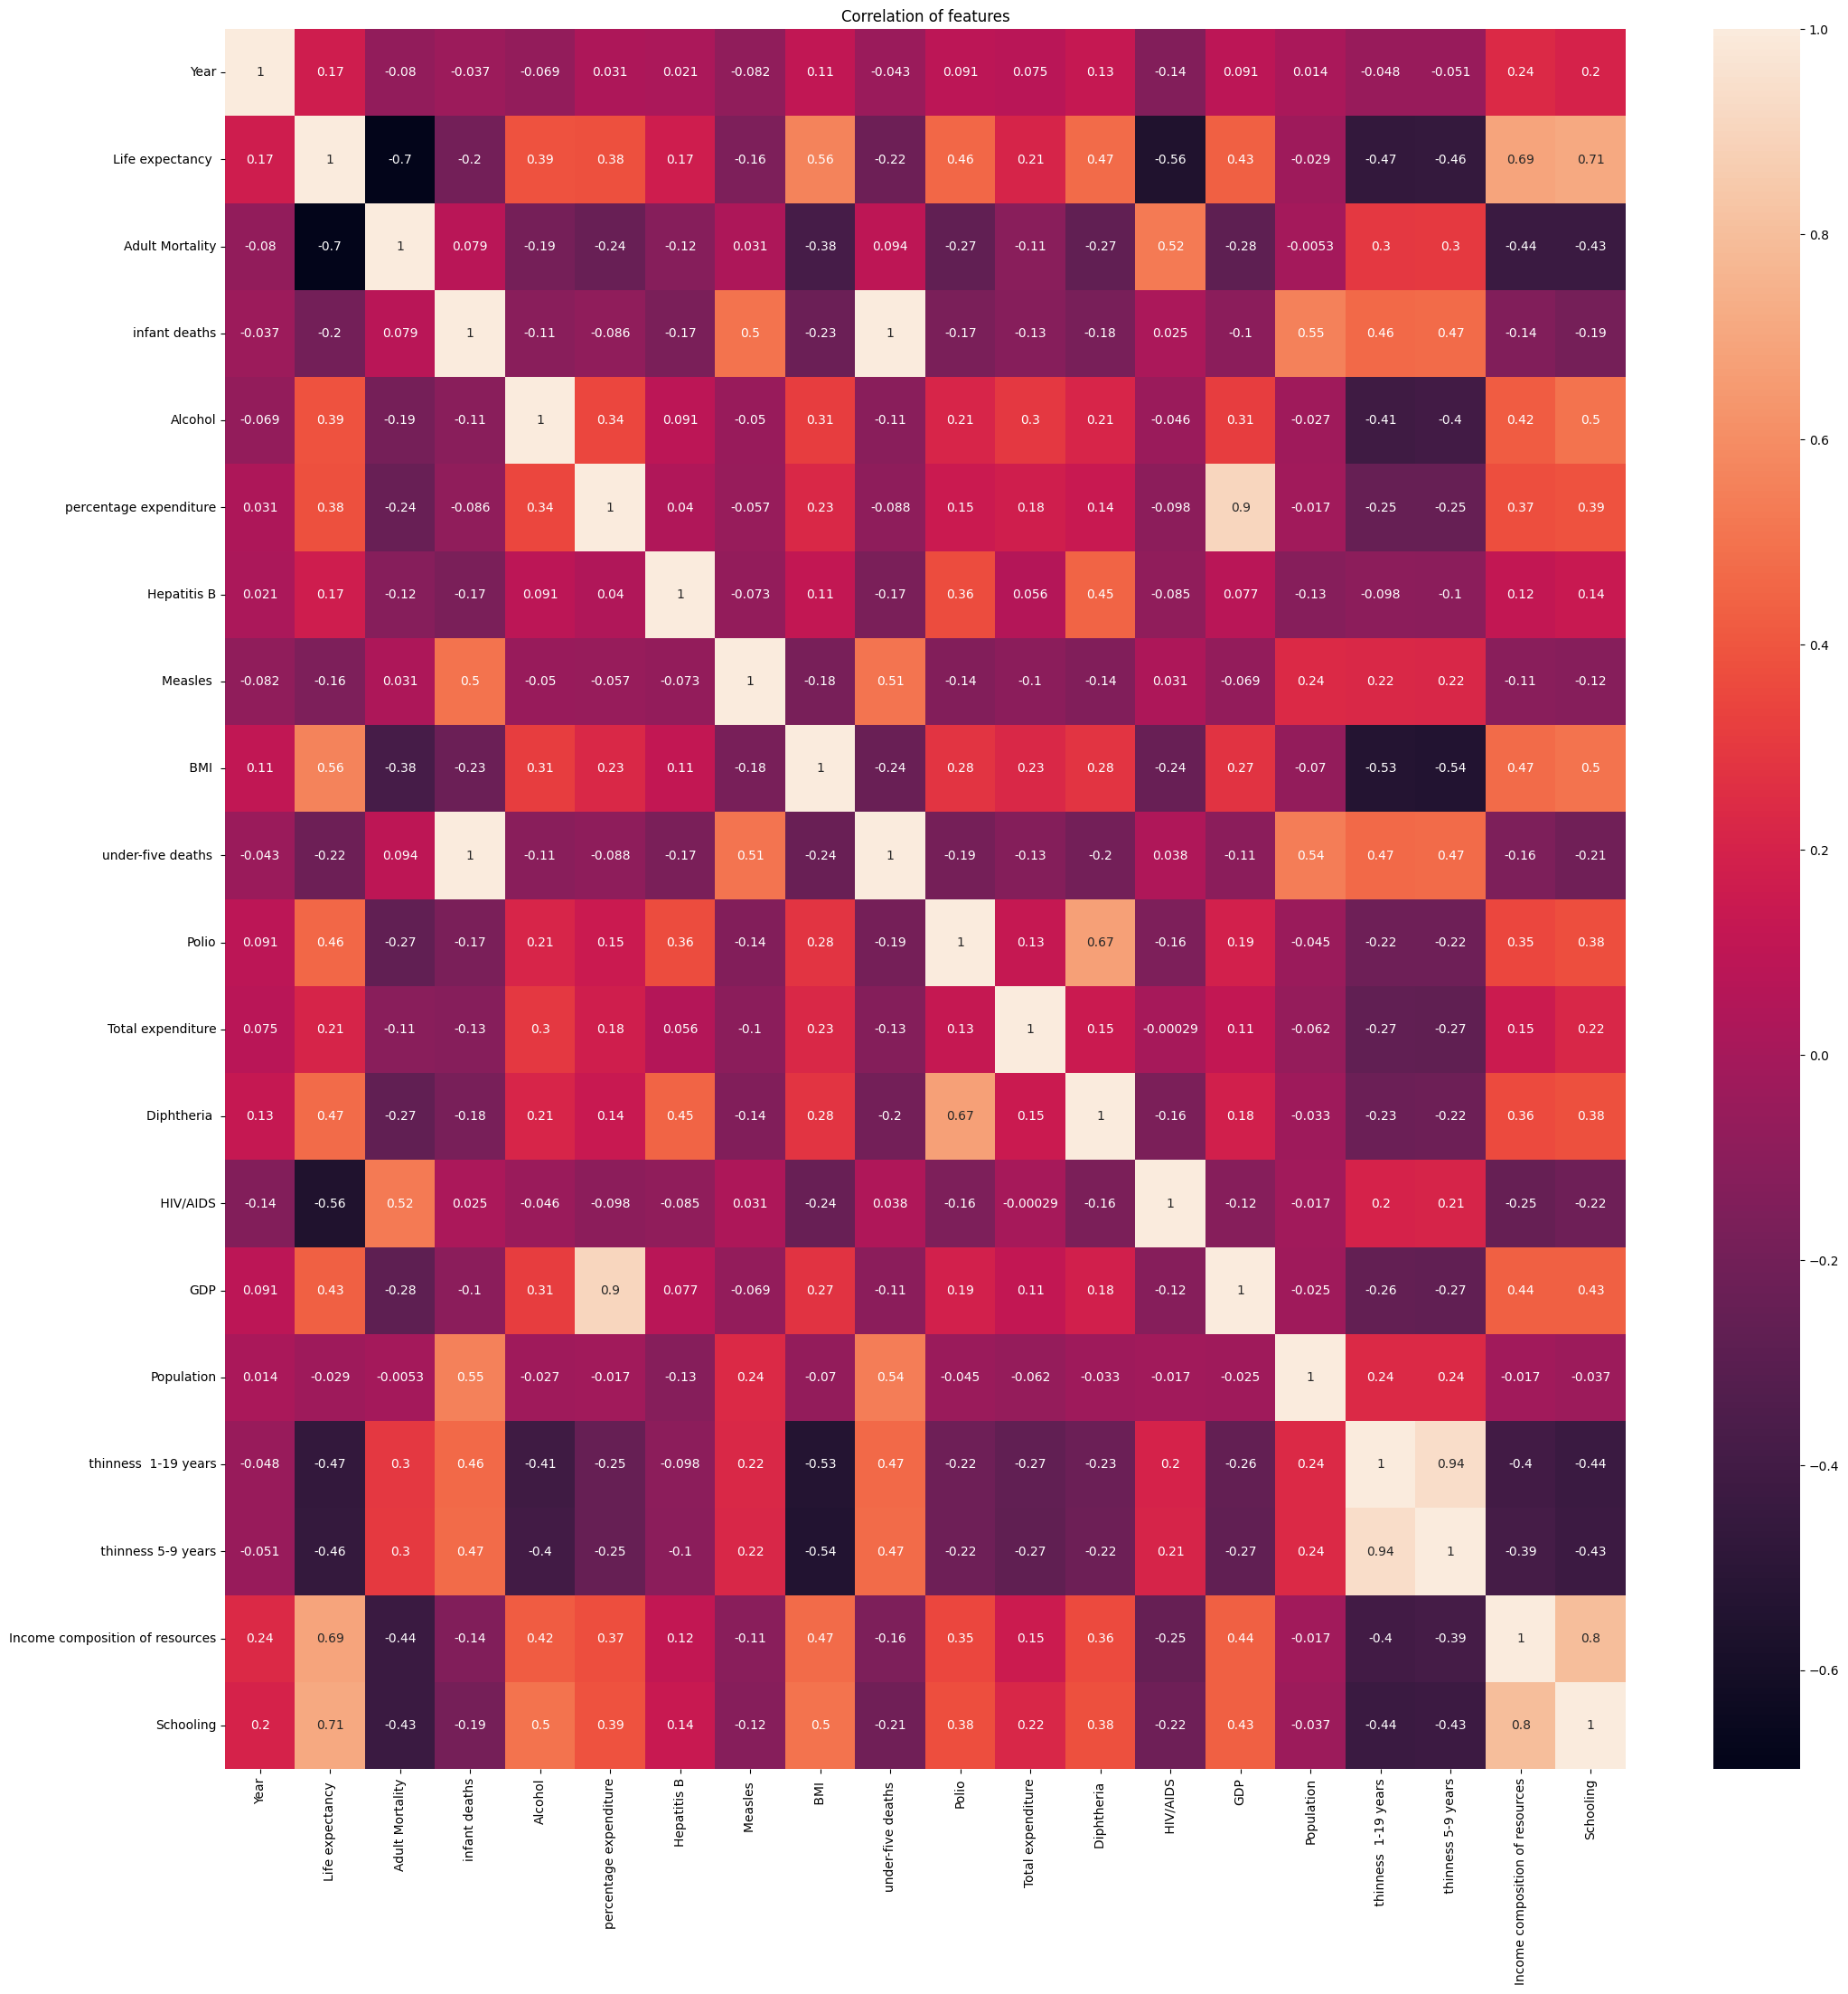

In [ ]:
# Plot heatmap of correlations between features
fig = plt.figure(figsize=(25,25))
plt.title('Correlation of features')
sns.heatmap(life_df.corr(), annot=True)

In [ ]:
def corr_with_thresh(
    df: pd.DataFrame,
    thresh: float=0.5
    ):
    """
    Searches and saves to dictionary features and their correlations

    Args:
        df: dataframe which will be manipulated
        thresh: threshold that we want to use

    Returns:
        Dictionary of features and the features they are correlated to
    """
    correlation = df.corr()
    correlation = correlation[(correlation>thresh) | (correlation<-thresh)]
    corr_vals = {}
    for c in correlation.columns:
        corr_columns = correlation[~correlation[c].isna()].index
        if len(corr_columns.drop(c)) <= 0:
            continue
        corr_vals[c]=corr_columns.drop(c).to_list()
    return corr_vals

In [ ]:
life_df_corr = corr_with_thresh(life_df, thresh=0.6)
life_df_corr

<ipython-input-9-006a210aa6e4>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


{'Life expectancy ': ['Adult Mortality',
  'Income composition of resources',
  'Schooling'],
 'Adult Mortality': ['Life expectancy '],
 'infant deaths': ['under-five deaths '],
 'percentage expenditure': ['GDP'],
 'under-five deaths ': ['infant deaths'],
 'Polio': ['Diphtheria '],
 'Diphtheria ': ['Polio'],
 'GDP': ['percentage expenditure'],
 ' thinness  1-19 years': [' thinness 5-9 years'],
 ' thinness 5-9 years': [' thinness  1-19 years'],
 'Income composition of resources': ['Life expectancy ', 'Schooling'],
 'Schooling': ['Life expectancy ', 'Income composition of resources']}

In [ ]:
depend_f = set(f for f in life_df_corr)
print('Len: ',len(depend_f))
depend_f

Len:  12


{' thinness  1-19 years',
 ' thinness 5-9 years',
 'Adult Mortality',
 'Diphtheria ',
 'GDP',
 'Income composition of resources',
 'Life expectancy ',
 'Polio',
 'Schooling',
 'infant deaths',
 'percentage expenditure',
 'under-five deaths '}

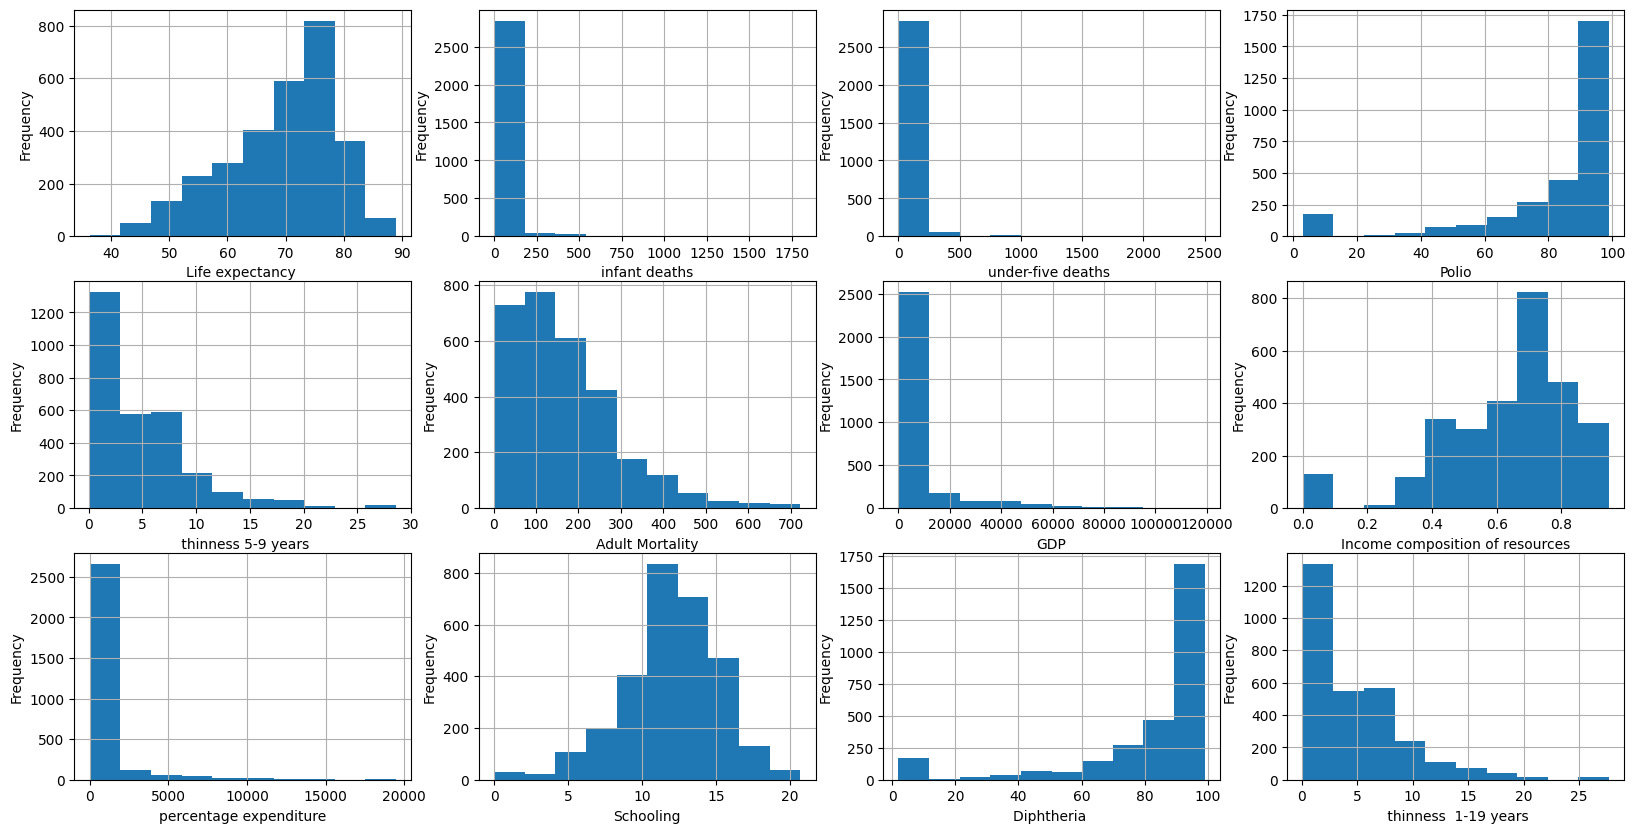

In [ ]:
# Plot distributions of values highly dependent with others features
fig = plt.figure(figsize=(20,10))
for i, d in enumerate(depend_f):
    fig.add_subplot(3,4,i+1)
    life_df[d].plot(kind='hist')
    plt.xlabel(d)
    plt.grid(True)

In [ ]:
# One-hot encode Status & delete countries names
life_df = pd.merge(left=life_df, right=pd.get_dummies(life_df['Status']), left_index=True, right_index=True)
life_df.drop(labels=['Country', 'Status'], axis=1, inplace=True)

In [ ]:
# Final look
life_df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


In [ ]:
life_df = life_df.sample(frac=1)

X = life_df.drop(labels=['Life expectancy '], axis=1).to_numpy()
y = life_df['Life expectancy '].to_numpy()

np.save(data / 'X.npy', X)
np.save(data / 'y.npy', y)

## Params

In [ ]:
%%writefile params.py
import os
import torch
import pathlib
from sklearn.metrics import mean_squared_error

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
LR = 0.01
EPOCHS = 100
DEVICE = 'cuda' if torch.cuda.is_available() else None
SAVE_PATH = pathlib.Path('./saved_models')
SUMMARY_SS = 1
LOSS_FN = torch.nn.MSELoss()
OPTIM = torch.optim.Adam
METRICS = {'MSE': mean_squared_error}

if not SAVE_PATH.is_dir():
    print('Creating a directory for saving models')
    SAVE_PATH.mkdir(parents=True, exist_ok=True)

Overwriting params.py


## Data

In [ ]:
%%writefile data.py
import pathlib
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from utils import train_val_split

array_dir = pathlib.Path('./data')
if not array_dir.is_dir():
    raise Exception("There is no such directory! Create one.")

X, y = np.load(array_dir / 'X.npy'), np.load(array_dir / 'y.npy')
X_train, y_train, X_val, y_val, X_test, y_test = train_val_split(X, y)

class Life_Expect_Dataset(Dataset):
    """
    Custom Dataset for Life expectancy csv data
    """
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        X = torch.tensor(self.X[idx], dtype=torch.float32)
        y = torch.tensor(self.y[idx], dtype=torch.float32)
        return X, y

train_dataset = Life_Expect_Dataset(X_train, y_train)
valid_dataset = Life_Expect_Dataset(X_val, y_val)
test_dataset = Life_Expect_Dataset(X_test, y_test)

Overwriting data.py


## Models

In [ ]:
%%writefile models.py
import torch
from torch import nn

class Model_V0(nn.Module):
    """
    Simple Dense(fully conected) neural network
    """
    def __init__(self, in_units, hidden_units, out_units):
        super().__init__()

        self.linear_layer = nn.Sequential(
            nn.Linear(in_units, hidden_units),
            nn.Linear(hidden_units, hidden_units),
            nn.Linear(hidden_units, hidden_units),
            nn.Linear(hidden_units, hidden_units),
            nn.Linear(hidden_units, out_units)
        )

    def forward(self, x):
        return self.linear_layer(x)

class Model_V1(nn.Module):
    """
    Simple Dense(fully conected) neural network
    """
    def __init__(self, in_units, hidden_units, out_units):
        super().__init__()

        self.linear_layer = nn.Sequential(
            nn.Linear(in_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, out_units)
        )

    def forward(self, x):
        return self.linear_layer(x)

class Model_V2(nn.Module):
    """
    Simple Dense(fully conected) neural network
    """
    def __init__(self, in_units, hidden_units, out_units):
        super().__init__()

        self.linear_layer = nn.Sequential(
            nn.Linear(in_units, hidden_units),
            nn.Dropout(p=0.5),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.Dropout(p=0.5),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.Dropout(p=0.5),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.Dropout(p=0.5),
            nn.ReLU(),
            nn.Linear(hidden_units, out_units)
        )

    def forward(self, x):
        return self.linear_layer(x)

Overwriting models.py


## Utils

In [ ]:
%%writefile utils.py
import pathlib
import logging
import json
import shutil
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

class RunningAverage():
    """
    Running average object calculates the average of values passed on each step,
    returns the average when called
    """

    def __init__(self):
        self.total = 0
        self.steps = 0

    def update(self, val):
        self.total+=val
        self.steps+=1

    def __call__(self):
        return self.total/float(self.steps)


def train_val_split(
    X: np.array,
    y: np.array,
    train_split: int=70
    ):
    """
    Acts like train_test_split() from sklearn + validation split

    Args:
        X: Feature matrix
        y: Target vector
        train_split: percent of train split

    Returns:
        Like sklearn function returns slices into train and test data
    """
    val_split = (100 - train_split) // 2
    t = len(y)
    p_s = t*train_split//100
    p_f = (t*val_split//100)+p_s
    X_train, y_train, X_val, y_val, X_test, y_test = X[:p_s], y[:p_s], X[p_s:p_f], y[p_s:p_f], X[p_f:], y[p_f:]
    return X_train, y_train, X_val, y_val, X_test, y_test


def set_logger(
    log_path: str
    ):
    """
    Outputs logs of the process into terminal bar + saves them into given path
    as a text file

    Args:
        log_path: path to the log file
    """

    logger = logging.getLogger()
    logger.setLevel(logging.INFO)

    if not logger.handlers:
        # File logging
        file_handler = logging.FileHandler(log_path)
        file_handler.setFormatter(logging.Formatter('%(asctime)s:%(levelname)s: %(message)s'))
        logger.addHandler(file_handler)

        # terminal loggging
        stream_handler = logging.StreamHandler()
        stream_handler.setFormatter(logging.Formatter('%(message)s'))
        logger.addHandler(stream_handler)


def save_checkpoint(
    state: dict,
    is_best: bool,
    checkpoint: str
    ):
    """
    Saves model and training parameter at checkpoints + `last.pth.tar`,
    has an option to save the best result `is_best==True` adds `best.pth.tar`

    Args:
        state: models state dict, may contain hyper parameter values
        is_best: True if it is the best model so far
        checkpoint: path to the folder with saved state dicts
    """
    dir_path = pathlib.Path(checkpoint)
    filepath = dir_path / 'last.pth.tar'
    if not dir_path.is_dir():
        print(f'Directory don\'t exist! Creating directory {checkpoint}.')
        dir_path.mkdir(parents=True, exist_ok=True)
    print('Saving checkpoint!')
    torch.save(state, filepath)
    if is_best:
        shutil.copyfile(filepath, dir_path / 'best.pth.tar')


def load_checkpoint(
    checkpoint: str,
    model: torch.nn.Module,
    optimizer: torch.optim=None
    ):
    """
    Loads models state dict from filepath,
    if optimizer provided => loads state_dict of optimizer

    Args:
        checkpoint: filename to load
        model: instance of a model where to load the state dict
        optimizer: if set adds an optimizer with tunned hyper params
    """
    dir_path = pathlib.Path(checkpoint)
    if not dir_path.isdir():
        raise (f'Directory {checkpoint} don\'t exist')
    checkpoint = torch.load(checkpoint)
    model.load_state_dict(checkpoint['state_dict'])

    if optimizer:
        optimizer.load_state_dict(checkpoint['optim_dict'])

    return checkpoint


def save_to_json(
    dictionary: dict,
    json_path: str
    ):
    """
    Parses a dict to a json file and saves it to a given path

    Args:
        dictionary: a dictionary
        json_path: path name where to save the file
    """
    path = pathlib.Path(json_path)
    with open(path, 'w') as file:
        dictionary = {k: float(v) for k, v in dictionary.items()}
        json.dump(dictionary, file, indent=4)

def plot_results(
    train_stats: np.array,
    val_stats: np.array
    ):
    """
    Plots the loss curve and MSE curve

    Args:
        train_stats: train metrics
        val_stats: val metrics
    """
    # List of dicts to dict of lists
    train_stats = {k: [dic[k] for dic in train_stats] for k in train_stats[0]}
    val_stats = {k: [dic[k] for dic in val_stats] for k in val_stats[0]}

    # Set subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

    # Plot first subplot
    ax1.plot(train_stats['loss'])
    ax1.plot(val_stats['loss'])

    # Set first title and legend
    ax1.set_title('Loss')
    ax1.legend(['Train', 'Validation'])

    # Plot second subplot
    ax2.plot(train_stats['MSE'])
    ax2.plot(val_stats['MSE'])

    # Set second title and legend
    ax2.set_title('MSE')
    ax2.legend(['Train', 'Validation'], loc='lower left')

    # Save image
    plt.savefig('plot.png')

    # Show image
    display(Image(filename='plot.png'))


Overwriting utils.py


## Engine

In [ ]:
%%writefile engine.py
import pathlib
import logging
import torch
import numpy as np
from tqdm.auto import tqdm
from params import *
from utils import RunningAverage, load_checkpoint, save_checkpoint, save_to_json


def train_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    summ_step: int=SUMMARY_SS,
    metrics: dict=METRICS,
    device: torch.device=DEVICE
    ):
    """
    Training part of training/validation loop

    Args:
        model: neural net
        dataloader: generator of batches (data, label)
        loss_fn: loss function to calculate the error between predicted and ground truth values
        optimizer: optimizer of model parameters
        summ_step: number of steps after which to store summary
        metrics: a dictionary of metrics we want to calculate for our models `accuracy`
        device: type of the device data is stored at
    """
    # Training mode
    model.train()

    # Make a summary list
    summary = []

    # Add running avarage object
    loss_avg = RunningAverage()

    # Create batch loop
    for i, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Forward pass
        logits = model(X)

        # Calculate loss
        loss = loss_fn(logits, y)

        # Clear gradients + backpropagation
        optimizer.zero_grad()
        loss.backward()

        # Set new weights
        optimizer.step()

    # Updating summary list with metrics
    if i % summ_step == 0:
        logits = logits.data.cpu().numpy()
        y = y.data.cpu().numpy()
        # Loop and calculate metrics
        summ = {metric: metrics[metric](logits, y) for metric in metrics}
        summ['loss'] = loss.item()
        summary.append(summ)

    # Update average loss
    loss_avg.update(loss.item())


    # Compute mean of all metrics in summary
    metrics_mean = {metric: np.mean([x[metric] for x in summary]) for metric in summary[0]}
    metrics_string = " ; ".join("{}: {:05.3f}".format(k, v) for k, v in metrics_mean.items())
    logging.info(" - Train metrics: " + metrics_string)
    return metrics_mean

def validation_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    metrics: dict=METRICS,
    device: torch.device=DEVICE
    ):
    """
    Validation part of training/validation loop

    Args:
        model: neural net
        dataloader: generator of batches (data, label)
        loss_fn: loss function to calculate the error between predicted and ground truth values
        metrics: a dictionary of metrics we want to calculate for our models `accuracy`
        device: type of the device data is stored at
    """
    # Evaluation mode
    model.eval()

    # Make a summary list
    summary = []

    # Add running avarage object
    loss_avg = RunningAverage()

    # Inference mode on
    with torch.inference_mode():
        # Create batch loop
        for (X, y) in dataloader:
            X, y = X.to(device), y.to(device)

            # Forward pass
            logits = model(X)

            # Calculate loss
            loss = loss_fn(logits, y)

            # Update average loss
            loss_avg.update(loss.item())

            # Move tensors to np
            logits = logits.data.cpu().numpy()
            y = y.data.cpu().numpy()

            # Compute metrics
            summ = {metric: metrics[metric](logits, y) for metric in metrics}
            summ['loss'] = loss.item()
            summary.append(summ)

        # Compute mean of all metrics in summary
        metrics_mean = {metric: np.mean([x[metric] for x in summary]) for metric in summary[0]}
        metrics_string = " ; ".join("{}: {:05.3f}".format(k, v) for k, v in metrics_mean.items())
        logging.info(" - Eval metrics: " + metrics_string)

        return metrics_mean


def train(
    model: torch.nn.Module,
    train_dataloader: torch.utils.data.DataLoader,
    valid_dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    summ_step: int=SUMMARY_SS,
    metrics: dict=METRICS,
    epochs: int=EPOCHS,
    restore_file: str=None,
    saving_path: str=SAVE_PATH,
    device: torch.device=DEVICE
    ):
    """
    Activation of training/validation loop

    Args:
        model: neural net
        train_dataloader: generator of training batches (data, label)
        valid_dataloader: generator of test batches (data, label)
        loss_fn: loss function to calculate the error between predicted and ground truth values
        optimizer: optimizer of model parameters
        summ_step: number of steps after which to store summary
        metrics: a dictionary of metrics we want to calculate for our models `accuracy`
        saving_path: a path were state dicts and json representation of them are saved
        device: type of the device data is stored at
    """

    # Reloade weight from restore file if specified
    if restore_file is not None:
        restore_file = restore_file + 'pth.tar'
        restore_path = SAVE_PATH / restore_file
        logging.info(f"Restored parameters from {restore_path}")
        load_checkpoint(restore_path, model, optimizer)

    # Set up summary variables
    best_val_acc = 0.0
    train_stats = []
    val_stats = []

    # Create train/test loop
    for epoch in tqdm(range(epochs)):
        # Print number of epochs
        logging.info(f"Epoch {epoch+1}/{epochs}")

        # Train
        train_metrics = train_step(model,
                                   train_dataloader,
                                   loss_fn,
                                   optimizer,
                                   summ_step,
                                   metrics,
                                   device)

        # Eval
        val_metrics = validation_step(model,
                                      valid_dataloader,
                                      loss_fn,
                                      metrics,
                                      device)

        # Save the best score of the chosen metric
        val_acc = val_metrics['MSE']
        is_best = val_acc >= best_val_acc

        # Save weights
        save_checkpoint({'epoch': epoch+1,
                         'state_dict': model.state_dict(),
                         'optim_dict': optimizer.state_dict()},
                        is_best=is_best,
                        checkpoint=SAVE_PATH)

        # If best eval, best_save_path
        if is_best:
            logging.info("- Found new best accuracy")
            best_val_acc = val_acc

            # Save best val metrics in a json file in the model directory
            best_json_path = SAVE_PATH / 'metrics_val_best_weights.json'
            save_to_json(val_metrics, best_json_path)

        # Save latest val metrics in a json file in the model directory
        last_json_path = SAVE_PATH / 'metrics_val_best_weights.json'
        save_to_json(val_metrics, best_json_path)

        train_stats.append(train_metrics)
        val_stats.append(val_metrics)

    return train_stats, val_stats

Overwriting engine.py


## Run

In [ ]:
%%writefile run.py
import warnings
import argparse
import pathlib
import logging
import torch
from torch.utils.data import DataLoader
from params import *
from utils import save_to_json, save_checkpoint, load_checkpoint, RunningAverage, set_logger, plot_results
from models import Model_V0
from data import train_dataset, valid_dataset, test_dataset
from engine import train

# Parse model arguments
parser = argparse.ArgumentParser(description='A parser that can recieve hyper parameters for a model NN to train on')
parser.add_argument('-e','--epochs', help='Number of epochs to run through', default=100, type=int)
parser.add_argument('--lr', help='Set learning rate of optimizer', default=0.001, type=float)
parser.add_argument('-b','--batch', help='Set batch size of dataloader', default=32, type=int)
parser.add_argument('--in_units', help='Set in units', default=21, type=int)
parser.add_argument('--hidden_units', help='Set hidden units', default=32, type=int)
parser.add_argument('--out_units', help='Set out units', default=1, type=int)
parser.add_argument('--sstep', help='Set summary step', default=1, type=int)
args = parser.parse_args()

EPOCHS = args.epochs
BATCH_SIZE = args.batch
SUMMARY_SS = args.sstep

# Shut down warnings
warnings.filterwarnings('ignore')

# Set random seed to 42
torch.manual_seed(42)
if DEVICE=='cuda':
    torch.cuda.manual_seed(42)

# Set logger
set_logger(SAVE_PATH / 'train.log')

# Instanciate model
logging.info("Model instance")
model = Model_V0(in_units=args.in_units, hidden_units=args.hidden_units, out_units=args.out_units).to(DEVICE)

# Set loss function and optimizer
logging.info("Set loss function")
loss_fn = LOSS_FN
logging.info("Set optimizer")
optimizer = OPTIM(params=model.parameters(), lr=args.lr)

# Create dataloaders
logging.info("Loading the datasets...")
train_dataloader = DataLoader(train_dataset,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

valid_dataloader = DataLoader(valid_dataset,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=False)

logging.info("- all done.")

# Train the model
logging.info(f"Start training for {EPOCHS} epoch(s)")
train_stats, val_stats = train(
    model=model,
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    summ_step=SUMMARY_SS,
    metrics=METRICS,
    epochs=EPOCHS,
    restore_file=None,
    saving_path=SAVE_PATH,
    device=DEVICE)

plot_results(train_stats, val_stats)

Overwriting run.py


In [ ]:
!python run.py -e 1000 --lr 0.0001 --batch 32 --hidden_units 64

Model instance
Set loss function
Set optimizer
Loading the datasets...
- all done.
Start training for 1000 epoch(s)
  0% 0/1000 [00:00<?, ?it/s]Epoch 1/1000
 - Train metrics: MSE: 127110104.000 ; loss: 127119504.000
 - Eval metrics: MSE: 2405924096.000 ; loss: 2405892666.286
Saving checkpoint!
- Found new best accuracy
  0% 1/1000 [00:01<17:00,  1.02s/it]Epoch 2/1000
 - Train metrics: MSE: 257076.875 ; loss: 257497.109
 - Eval metrics: MSE: 44443488.000 ; loss: 44448142.250
Saving checkpoint!
  0% 2/1000 [00:01<11:09,  1.49it/s]Epoch 3/1000
 - Train metrics: MSE: 1146935040.000 ; loss: 1147033088.000
 - Eval metrics: MSE: 25628479488.000 ; loss: 25628583394.286
Saving checkpoint!
- Found new best accuracy
  0% 3/1000 [00:01<09:21,  1.78it/s]Epoch 4/1000
 - Train metrics: MSE: 200889.438 ; loss: 201151.250
 - Eval metrics: MSE: 45536228.000 ; loss: 45540879.848
Saving checkpoint!
  0% 4/1000 [00:02<08:31,  1.95it/s]Epoch 5/1000
 - Train metrics: MSE: 519256.312 ; loss: 511443.844
 - Eva